# Trade network analysis
**Brian Dew (brianwdew@gmail.com)**

`07_individual_product.ipynb`

This notebook summarizes results for an individual product and year. 

METODO:

1. Annotate

#### Import packages

In [68]:
# uses panadas, networkx, powerlaw, and os packages
import pandas as pd
import networkx as nx
import powerlaw
import os
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize

os.chdir('C:/Working/trade_network/data/')        # Change to working directory

#### Build network and fit to distributions

The work of deg_dist is repeated here for the product code identified in `prod` 

In [90]:
pl_ = {}
prod = 901890
df = pd.read_csv('clean/baci07_2014_clean.csv', index_col='hs6').sort_index()
G = nx.from_pandas_dataframe(df.loc[prod], 'i', 'j', 'v', nx.DiGraph())  #build network
deg = G.out_degree(weight='v').values()         # calc weighted outdeg for each country
fit = powerlaw.Fit(deg)         # est. distrib. and save alpha value

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


#### Print the estimated values

Print estimated alpha value, std dev, and estimated minimum value/cutoff for the distribution

In [91]:
print 'Alpha: ', fit.power_law.alpha
print 'Sigma: ', fit.power_law.sigma
print 'X-Min: ', fit.power_law.xmin

Alpha:  2.43375465321
Sigma:  0.432293293284
X-Min:  1127479.00364


#### Compare fit

Compare the how well the data fit a power law compared to exponential distribution.

In [92]:
fit.distribution_compare('power_law', 'exponential')

(1.2355425201285062, 0.36866109307124961)

#### Plot fit

How well do the data (solid line) fit the distribution (dashed line)?

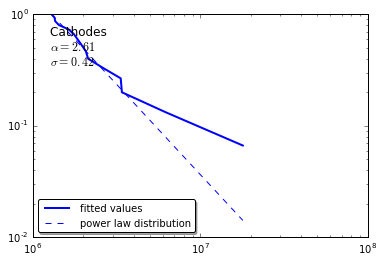

In [89]:
fig2 = fit.plot_ccdf(label='fitted values', color='b', linewidth=2)
fit.power_law.plot_ccdf(label='power law distribution', color='b', linestyle='--', ax=fig2)
plt.legend(handlelength=3, fancybox=True, shadow=True, loc=3, prop={'size':10})
fig2.text(0.05, 0.95, 'Instruments used in \n \n$\\alpha = 2.43$ \n$\\sigma = 0.43$', transform=fig2.transAxes, fontsize=12,
        verticalalignment='top')
plt.savefig('cathode_ccdf.pdf', bbox_inches='tight')